In [311]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [312]:
#Loading Dataset
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\diabetes.csv')

In [313]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [314]:
#EDA and Preprocessing
df.shape #It has 768 rows and 9 columns

(768, 9)

In [315]:
df.columns #About the dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

    Pregnancies :- Number of times a woman has been pregnant
    Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
    BloodPressure :- Diastollic Blood Pressure (mm hg)
    SkinThickness :- Triceps skin fold thickness(mm)
    Insulin :- 2 hour serum insulin(mu U/ml)
    BMI :- Body Mass Index ((weight in kg/height in m)^2)
    Age :- Age(years)
    DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
    Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)


In [316]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [318]:
df.duplicated().sum() #there are no duplicate values

0

In [319]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [320]:
for i in df.columns:                        #Using Forloop to check if any unique values/special characters in the data set.
    print({i:df[i].unique()})    

{'Pregnancies': array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)}
{'Glucose': array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)}
{'BloodPressure': array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  8

What does the statistics generated by df.describe means:-
 
    count - tells us the number of NoN-empty rows in a feature.
    mean - tells us the mean value of that feature.
    std - tells us the Standard Deviation Value of that feature.
    min - tells us the minimum value of that feature.
    25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
    max - tells us the maximum value of that feature.

In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The above descriptive statistics shows the following:-
      
The minimun count in the columns of Glucose, BloodPresure, SkinThickness, Insulin and BMI is zero.

This doesn't make any sense, therefore replacing all the zeroes present in the columns into NaN and later replace it with suitable values.
      

In [322]:
df[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']].replace(0,np.NaN)
#Replaced 0 with NaN in the above colums

In [323]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

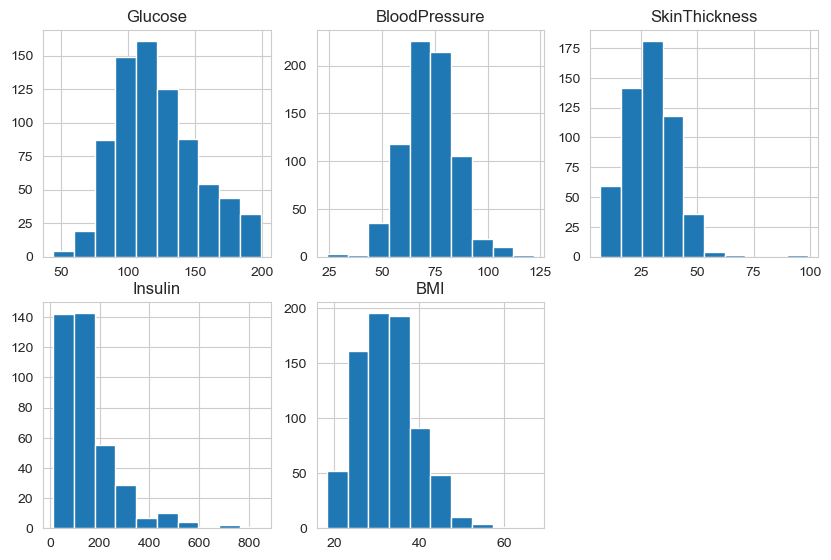

In [324]:
#Checking their distribution to fill the NaN values

plt.subplot(331)
df['Glucose'].hist(figsize = (10,10))
plt.title('Glucose')

plt.subplot(332)
df['BloodPressure'].hist(figsize = (10,10))
plt.title('BloodPressure')

plt.subplot(333)
df['SkinThickness'].hist(figsize = (10,10))
plt.title('SkinThickness')

plt.subplot(334)
df['Insulin'].hist(figsize = (10,10))
plt.title('Insulin')

plt.subplot(335)
df['BMI'].hist(figsize = (10,10))
plt.title('BMI')

plt.show()

In the above plot we observe that: Glucose and BloodPressure have normal distribution whereas SkinThickness, Insulin, BMI have skewed distribution.
Therefore for normal distribution we use mean and for skewed distribution we use median.

In [325]:
#Filling the NaN values with their respective values according to their distribution
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [326]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

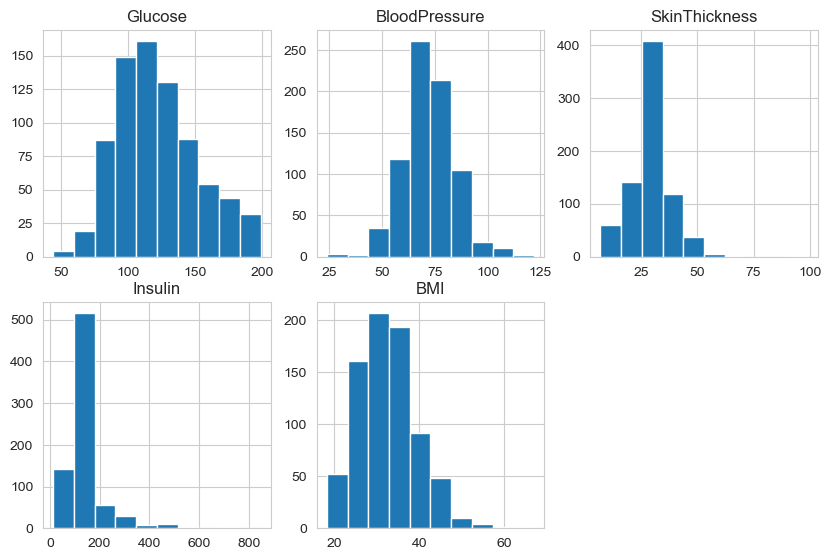

In [327]:
#Checking distribution after replacing the NaN values

plt.subplot(331)
df['Glucose'].hist(figsize = (10,10))
plt.title('Glucose')

plt.subplot(332)
df['BloodPressure'].hist(figsize = (10,10))
plt.title('BloodPressure')

plt.subplot(333)
df['SkinThickness'].hist(figsize = (10,10))
plt.title('SkinThickness')

plt.subplot(334)
df['Insulin'].hist(figsize = (10,10))
plt.title('Insulin')

plt.subplot(335)
df['BMI'].hist(figsize = (10,10))
plt.title('BMI')

plt.show()

# Data Visualization

In [328]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [329]:
#Distribution of 'Outcome'
#Converting value 0 into 'No' and 1 into 'Yes'
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

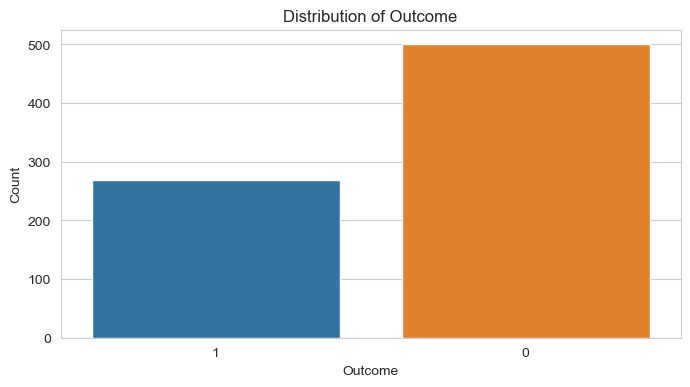

In [330]:
#df['Outcome'] = ['Yes' if i == 1 else 'No' for i in df['Outcome']]

plt.figure(figsize=(8,4))
sns.countplot(x='Outcome',data=df,order=df['Outcome'].value_counts().sort_values(ascending=True).index)
plt.title('Distribution of Outcome')

plt.xlabel('Outcome',size = 10)
plt.ylabel('Count',size = 10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

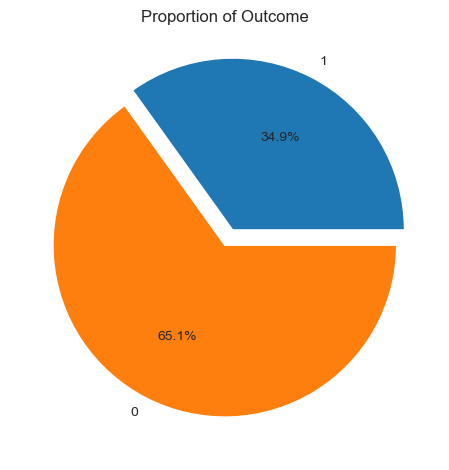

In [331]:
plt.pie(df['Outcome'].value_counts().sort_values(), labels=df['Outcome'].unique(), autopct='%1.1f%%', explode=[0.1,0])
plt.title('Proportion of Outcome')
plt.tight_layout()
plt.show()

From the above plots its observed that most number of the people does not have diabeties which indicates the dataset is imbalanced

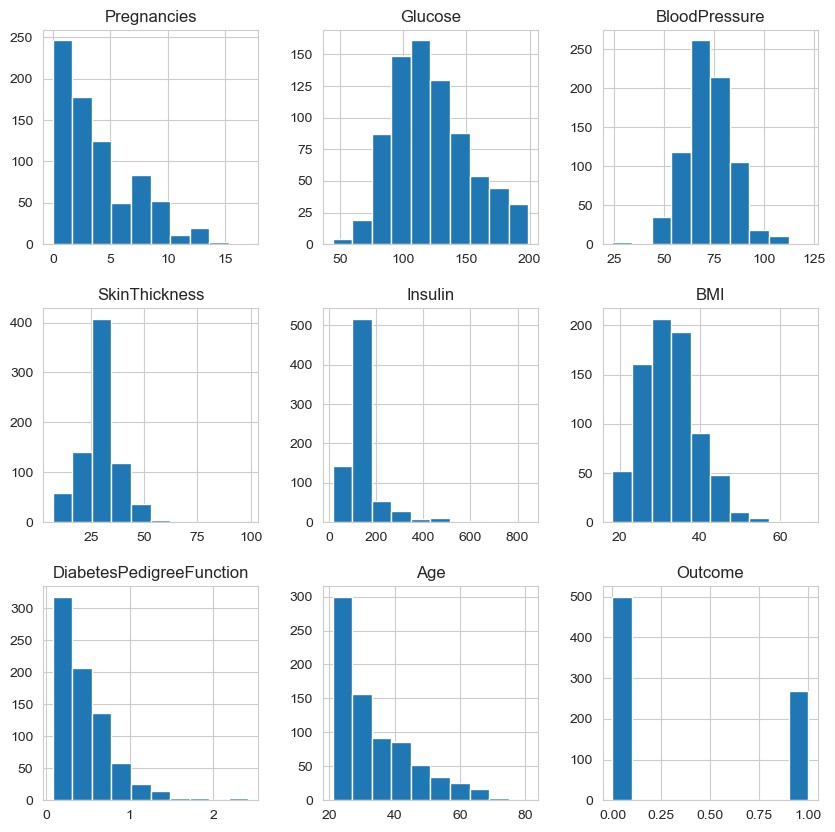

In [332]:
#Distribution of each feature
df.hist(bins=10, figsize = (10,10))
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

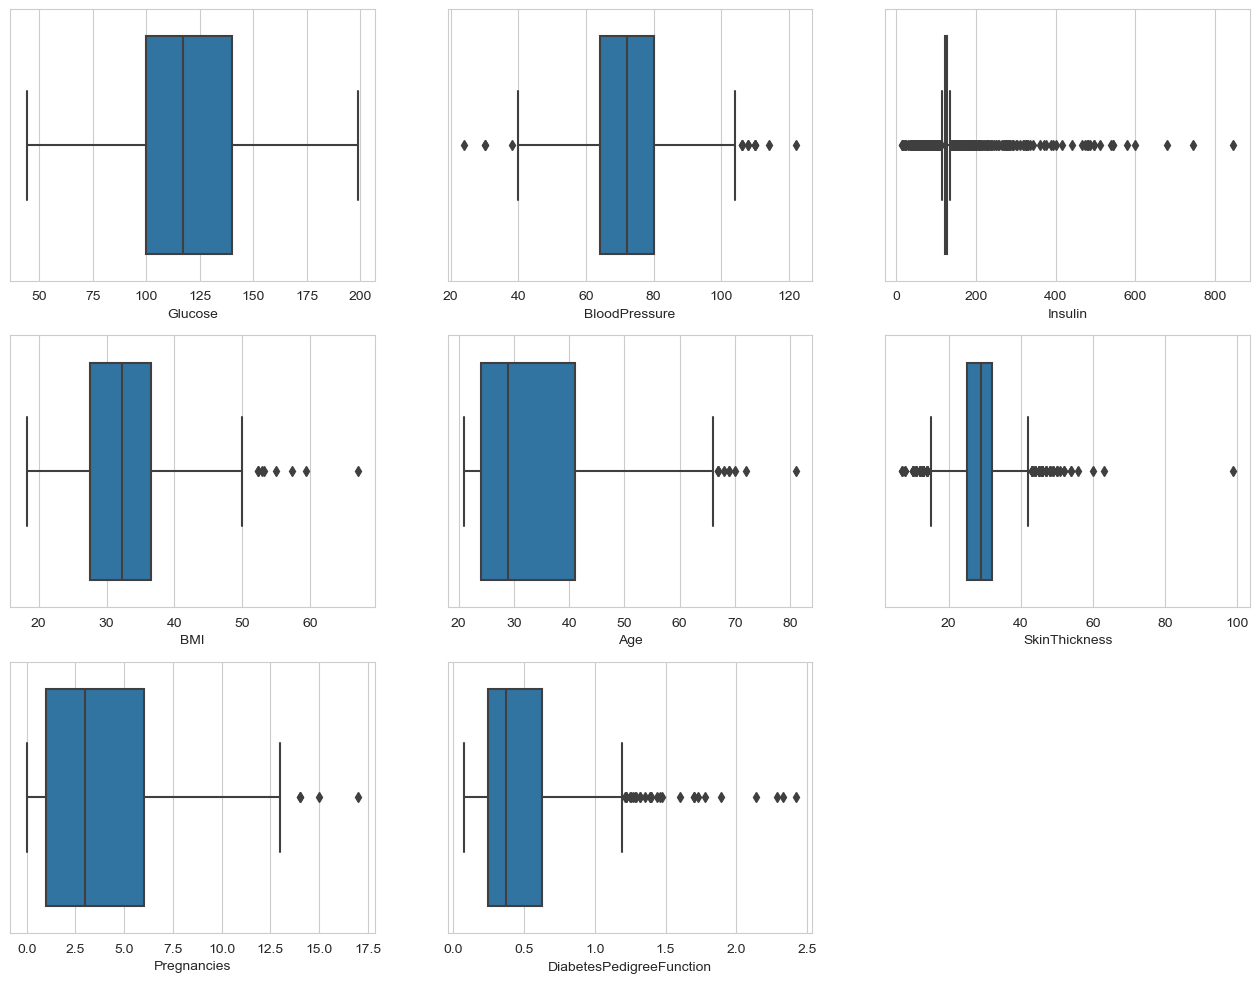

In [333]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

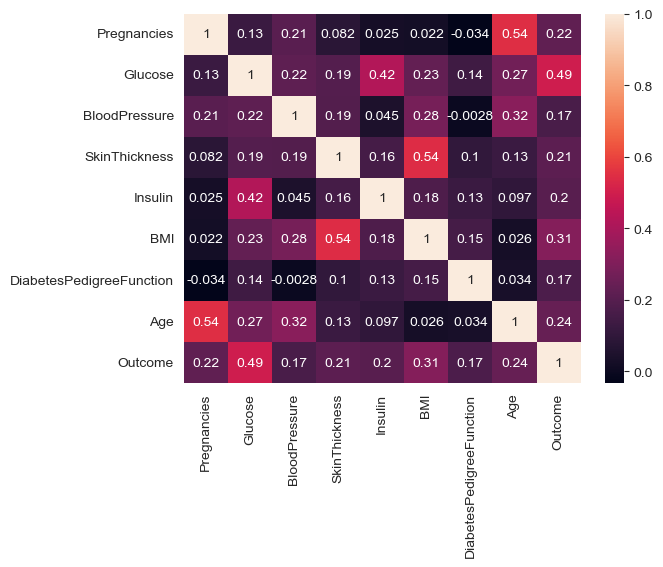

In [334]:
x= df
corr_df=x.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

From the above Heat map we observe that for Outcome the features like Glucose, BMI and Age have high correlation scores and therefore they are highly correlated.
Whereas features like BloodPressure, Insulin and DiabetesPedigreeFunction are least correlated.

Hence we can say the dont contribute much to the model, so we can drop them

In [335]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [336]:
#NEED TO TREAT THE OUTLIERS

In [337]:
#imputing outliers

In [338]:
# def find_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    return outliers

In [339]:
# outliers = find_outliers_IQR(df)

# print('number of outliers:' + str(len(outliers)))

# print('max outlier value:' + str(outliers.max()))

# print('min outlier value:' + str(outliers.min()))

# outliers

In [340]:
# outliers = find_outliers_IQR(df['Pregnancies'])

# print('number of outliers:' + str(len(outliers)))

# print('max outlier value:' + str(outliers.max()))

# print('min outlier value:' + str(outliers.min()))

# outliers

In [341]:
# def impute_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    upper = df[~(df>(q3+1.5*IQR))].max()

#    lower = df[~(df<(q1-1.5*IQR))].min()

#    DF = np.where(df > upper,

#        df.mean(),

#        np.where(

#            df < lower,

#            df.mean(),

#            df

#            )

#        )

#    return df

In [342]:
# df['Pregnancies'] = impute_outliers_IQR(df['Pregnancies'])

In [343]:
# df.describe()['Pregnancies']

In [344]:
# df = impute_outliers_IQR(df)

In [345]:
# df.describe().T

In [301]:
#Dropping out liers

In [351]:
upper_limit = df.mean() + 3*df.std()

print(upper_limit)

lower_limit = df.mean() - 3*df.std()

print(lower_limit)

Pregnancies                  13.893044
Glucose                     212.994609
BloodPressure               108.694223
SkinThickness                55.481736
Insulin                     399.821054
BMI                          53.080739
DiabetesPedigreeFunction      1.465862
Age                          68.521580
Outcome                       1.779812
dtype: float64
Pregnancies                  -6.213838
Glucose                      30.378916
BloodPressure                36.116146
SkinThickness                 2.734410
Insulin                    -118.477304
BMI                          11.829678
DiabetesPedigreeFunction     -0.522109
Age                          -2.039809
Outcome                      -1.081896
dtype: float64


In [353]:
DF = np.where(df > upper_limit,

   upper_limit,

   np.where(

       df < lower_limit,

       lower_limit,

       df

   )

)

In [354]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.839603,3.351147,0.000,1.00000,3.000000,6.00000,13.953786
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.000000
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.000000
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.000000
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.000000
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.100000
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.420000
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.000000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.000000


In [355]:
df.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'],axis = 1, inplace = True)

In [356]:
# Creating x and y variables.
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [357]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
print(x)

[[ 0.645094    0.86510807  0.67064253  0.16661938  1.4259954 ]
 [-0.84790477 -1.20616153 -0.01230129 -0.85219976 -0.19067191]
 [ 1.2422935   2.0158134  -0.01230129 -1.33250021 -0.10558415]
 ...
 [ 0.34649424 -0.0225789  -0.69524511 -0.910418   -0.27575966]
 [-0.84790477  0.14180757 -0.01230129 -0.34279019  1.17073215]
 [-0.84790477 -0.94314317  0.21534665 -0.29912651 -0.87137393]]


In [358]:
x.shape

(768, 5)

In [359]:
y.shape

(768,)

In [360]:
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [361]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 5)
(537,)
(231, 5)
(231,)


In [362]:
#MODELLING

# LOGISTIC REGRESSION


In [363]:
from sklearn.linear_model import LogisticRegression
#create a model
Log=LogisticRegression()
#fitting training data into the model
Log.fit(x_train,y_train)
y_pred1=Log.predict(x_test)

In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred1)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred1))
 
acc=accuracy_score(y_test,y_pred1)
print('accuracy of the model: ',acc)

[[126  18]
 [ 45  42]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       144
           1       0.70      0.48      0.57        87

    accuracy                           0.73       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.72      0.73      0.71       231

accuracy of the model:  0.7272727272727273


In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model
Log=LogisticRegression()
#fitting training data into the model
Log.fit(x_train,y_train)
y_pred1=Log.predict(x_test)

# Decision Tree

In [365]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

Dt.fit(x_train,y_train)

y_pred2=Dt.predict(x_test)

In [366]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred2)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred2))
 
acc=accuracy_score(y_test,y_pred2)
print('accuracy of the model: ',acc)

[[116  28]
 [ 48  39]]
classification report: 
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       144
           1       0.58      0.45      0.51        87

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231

accuracy of the model:  0.670995670995671


# Random Forest

In [367]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)

In [368]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred3)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred3))
 
acc=accuracy_score(y_test,y_pred3)
print('accuracy of the model: ',acc)

[[130  14]
 [ 45  42]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.90      0.82       144
           1       0.75      0.48      0.59        87

    accuracy                           0.74       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.74      0.73       231

accuracy of the model:  0.7445887445887446


# KNN

In [369]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred4=knn.predict(x_test)

In [370]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred4)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred4))
 
acc=accuracy_score(y_test,y_pred4)
print('accuracy of the model: ',acc)

[[117  27]
 [ 43  44]]
classification report: 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       144
           1       0.62      0.51      0.56        87

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231

accuracy of the model:  0.696969696969697


# SVM

In [371]:
from sklearn.svm import SVC

svm=SVC()

svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test)

In [372]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred5)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred5))
 
acc=accuracy_score(y_test,y_pred5)
print('accuracy of the model: ',acc)

[[125  19]
 [ 50  37]]
classification report: 
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       144
           1       0.66      0.43      0.52        87

    accuracy                           0.70       231
   macro avg       0.69      0.65      0.65       231
weighted avg       0.69      0.70      0.68       231

accuracy of the model:  0.7012987012987013


# AdaBoostClassifier

In [373]:
from sklearn.ensemble import AdaBoostClassifier

adc=AdaBoostClassifier()

adc.fit(x_train,y_train)
y_pred6=adc.predict(x_test)

In [374]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred6)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred6))
 
acc=accuracy_score(y_test,y_pred6)
print('accuracy of the model: ',acc)

[[125  19]
 [ 44  43]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       144
           1       0.69      0.49      0.58        87

    accuracy                           0.73       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

accuracy of the model:  0.7272727272727273


#

# GradientBoostingClassifier

In [375]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

gbc.fit(x_train,y_train)
y_pred7=gbc.predict(x_test)

In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred7)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred7))
 
acc=accuracy_score(y_test,y_pred7)
print('accuracy of the model: ',acc)

[[125  19]
 [ 41  46]]
classification report: 
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       144
           1       0.71      0.53      0.61        87

    accuracy                           0.74       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231

accuracy of the model:  0.7402597402597403


# ExtraTreesClassifier

In [377]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier()

etc.fit(x_train,y_train)
y_pred8=etc.predict(x_test)

In [378]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred8)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred8))
 
acc=accuracy_score(y_test,y_pred8)
print('accuracy of the model: ',acc)

[[128  16]
 [ 46  41]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.72      0.47      0.57        87

    accuracy                           0.73       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.73      0.73      0.72       231

accuracy of the model:  0.7316017316017316


# XGBOOST

In [379]:
from xgboost import XGBClassifier

xgb=XGBClassifier()

xgb.fit(x_train,y_train)
y_pred9=xgb.predict(x_test)

In [380]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred9)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred9))
 
acc=accuracy_score(y_test,y_pred9)
print('accuracy of the model: ',acc)

[[124  20]
 [ 42  45]]
classification report: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       144
           1       0.69      0.52      0.59        87

    accuracy                           0.73       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.73      0.72       231

accuracy of the model:  0.7316017316017316


In [ ]:
 #tuning the models
#feature importance
# check the curves